In [1]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("src/df_final.csv")
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,City,Time_taken(min),City_code,Time_Difference,distance,day,month,day_of_week,is_weekend,Time_category
0,0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,...,Urban,24.0,INDO,15.0,3.02,19,3,5,1,morning
1,1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,...,Metropolitian,33.0,BANG,5.0,20.14,25,3,4,0,evening
2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,...,Urban,26.0,BANG,15.0,1.55,19,3,5,1,morning
3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,...,Metropolitian,21.0,COIMB,10.0,7.77,5,4,1,0,evening
4,4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,...,Metropolitian,30.0,CHEN,15.0,6.20,26,3,5,1,afternoon


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 


In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Hour_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'City_code', 'Time_Difference', 'distance',
       'day', 'month', 'day_of_week', 'is_weekend', 'Time_category'],
      dtype='object')

In [5]:
df 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Hour_picked,...,City,Time_taken(min),City_code,Time_Difference,distance,day,month,day_of_week,is_weekend,Time_category
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11,...,Urban,24.000000,INDO,15.0,3.02,19,3,5,1,morning
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19,...,Metropolitian,33.000000,BANG,5.0,20.14,25,3,4,0,evening
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8,...,Urban,26.000000,BANG,15.0,1.55,19,3,5,1,morning
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18,...,Metropolitian,21.000000,COIMB,10.0,7.77,5,4,1,0,evening
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13,...,Metropolitian,30.000000,CHEN,15.0,6.20,26,3,5,1,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56442,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21,...,Metropolitian,21.972500,JAP,10.0,16.37,27,3,6,1,evening
56443,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-11,11,...,Metropolitian,29.390000,JAP,5.0,1.49,11,3,4,0,morning
56444,0x1ea5,SURRES11DEL03,38.0,4.7,21.157735,72.768778,21.217735,72.828778,2022-03-11,21,...,Metropolitian,26.244167,SUR,10.0,9.11,11,3,4,0,evening
56445,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-06,18,...,Metropolitian,23.752500,VAD,5.0,19.66,6,3,6,1,evening


In [6]:
feature_list = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Hour_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'distance', 'day', 'month', 'day_of_week', 'is_weekend', 'Time_category']
X = df.loc[:, feature_list]
y = df.loc[:, "Time_taken(min)"]

print (X.shape)
print (y.shape)

print(X)
print(type(X))

print(y)
print(type(y))

(56447, 17)
(56447,)
       Delivery_person_Age  Delivery_person_Ratings  Hour_picked  \
0                     37.0                      4.9           11   
1                     34.0                      4.5           19   
2                     23.0                      4.4            8   
3                     38.0                      4.7           18   
4                     32.0                      4.6           13   
...                    ...                      ...          ...   
56442                 35.0                      4.6           21   
56443                 33.0                      4.9           11   
56444                 38.0                      4.7           21   
56445                 27.0                      4.7           18   
56446                 39.0                      5.0           22   

      Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                 Sunny                 High                  2         Snack   


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) 


In [8]:
X_train.head(20)

,Delivery_person_Age,Delivery_person_Ratings,Hour_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,day,month,day_of_week,is_weekend,Time_category
5902,32.0,4.8,17,Stormy,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,20.14,31,3,3,0,afternoon
1603,21.0,4.3,12,Fog,High,2,Meal,motorcycle,0.0,No,Metropolitian,5.96,13,2,6,1,afternoon
26272,39.0,4.8,20,Cloudy,Jam,0,Drinks,motorcycle,3.0,No,Metropolitian,20.16,2,4,5,1,evening
12845,26.0,4.9,11,Sunny,High,1,Drinks,scooter,0.0,No,Urban,1.55,3,4,6,1,morning
14439,29.0,4.9,20,Windy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,19.73,2,3,2,0,evening
22688,30.0,4.7,10,Cloudy,Low,1,Buffet,scooter,1.0,No,Urban,3.02,28,3,0,0,morning
17991,25.0,5.0,20,Sunny,Jam,1,Drinks,scooter,0.0,No,Metropolitian,4.71,17,3,3,0,evening
5834,26.0,4.8,14,Windy,High,0,Drinks,motorcycle,1.0,No,Metropolitian,5.95,5,3,5,1,afternoon
41992,20.0,4.6,15,Cloudy,Medium,1,Drinks,scooter,0.0,No,Metropolitian,6.12,1,3,1,0,afternoon
10435,31.0,4.7,19,Sunny,Medium,2,Snack,scooter,0.0,No,Urban,20.40,25,3,4,0,evening


In [9]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Hour_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'City_code', 'Time_Difference', 'distance',
       'day', 'month', 'day_of_week', 'is_weekend', 'Time_category'],
      dtype='object')

In [10]:
X_train.isnull().any()


Delivery_person_Age        False
Delivery_person_Ratings    False
Hour_picked                False
Weatherconditions          False
Road_traffic_density       False
Vehicle_condition          False
Type_of_order              False
Type_of_vehicle            False
multiple_deliveries        False
Festival                   False
City                       False
distance                   False
day                        False
month                      False
day_of_week                False
is_weekend                 False
Time_category              False
dtype: bool

'Delivery_person_Age', 'Delivery_person_Ratings', 'Hour_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'distance', 'day', 'month', 'day_of_week', 'is_weekend', 'Time_category

age, rating, hour_picked, multiple_deliveries, distance

In [11]:
numeric_features = [0,1,2,8,11] 
numeric_transformer = StandardScaler()

categorical_features = [3,4,5,6,7,9,10,12,13,14,15,16] 
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
      ('cat', categorical_transformer, categorical_features),
      ('num', numeric_transformer, numeric_features)])

X_train = feature_encoder.fit_transform(X_train)

print(X_train[0:5,:])

  (0, 3)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 16)	1.0
  (0, 20)	1.0
  (0, 22)	1.0
  (0, 24)	1.0
  (0, 56)	1.0
  (0, 58)	1.0
  (0, 63)	1.0
  (0, 67)	1.0
  (0, 69)	1.0
  (0, 73)	0.3619351304259221
  (0, 74)	0.5043703586116792
  (0, 75)	-0.02999372019753624
  (0, 76)	0.4333310935447534
  (0, 77)	1.8608973867713865
  (1, 1)	1.0
  (1, 6)	1.0
  (1, 12)	1.0
  (1, 16)	1.0
  (1, 20)	1.0
  (1, 22)	1.0
  (1, 24)	1.0
  (1, 39)	1.0
  :	:
  (3, 66)	1.0
  (3, 68)	1.0
  (3, 71)	1.0
  (3, 73)	-0.6543715138673749
  (3, 74)	0.8112605059380649
  (3, 75)	-1.1572733065147591
  (3, 76)	-1.3281174788920482
  (3, 77)	-1.4628684265363112
  (4, 5)	1.0
  (4, 7)	1.0
  (4, 10)	1.0
  (4, 15)	1.0
  (4, 20)	1.0
  (4, 22)	1.0
  (4, 24)	1.0
  (4, 28)	1.0
  (4, 58)	1.0
  (4, 62)	1.0
  (4, 67)	1.0
  (4, 70)	1.0
  (4, 73)	-0.14621819172072636
  (4, 74)	0.8112605059380649
  (4, 75)	0.5336460729610752
  (4, 76)	0.4333310935447534
  (4, 77)	1.7875921698022548


In [12]:
Regressor = RandomForestRegressor(n_estimators=100,min_samples_split=100, max_depth=15)
Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=100)

In [13]:
print(X_train[:10])

y_train_pred = Regressor.predict(X_train)

print(y_train_pred[:5])

  (0, 3)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 16)	1.0
  (0, 20)	1.0
  (0, 22)	1.0
  (0, 24)	1.0
  (0, 56)	1.0
  (0, 58)	1.0
  (0, 63)	1.0
  (0, 67)	1.0
  (0, 69)	1.0
  (0, 73)	0.3619351304259221
  (0, 74)	0.5043703586116792
  (0, 75)	-0.02999372019753624
  (0, 76)	0.4333310935447534
  (0, 77)	1.8608973867713865
  (1, 1)	1.0
  (1, 6)	1.0
  (1, 12)	1.0
  (1, 16)	1.0
  (1, 20)	1.0
  (1, 22)	1.0
  (1, 24)	1.0
  (1, 39)	1.0
  :	:
  (8, 61)	1.0
  (8, 67)	1.0
  (8, 69)	1.0
  (8, 73)	-1.670678158160672
  (8, 74)	-0.10940993604108933
  (8, 75)	-0.4057535823032772
  (8, 76)	-1.3281174788920482
  (8, 77)	-0.6457834471486739
  (9, 4)	1.0
  (9, 9)	1.0
  (9, 12)	1.0
  (9, 17)	1.0
  (9, 21)	1.0
  (9, 22)	1.0
  (9, 26)	1.0
  (9, 50)	1.0
  (9, 58)	1.0
  (9, 64)	1.0
  (9, 67)	1.0
  (9, 70)	1.0
  (9, 73)	0.19255068971037265
  (9, 74)	0.1974802112852963
  (9, 75)	0.3457661419082047
  (9, 76)	-1.3281174788920482
  (9, 77)	1.9073836219225426
[37.85426425 33.67720204 47.79049229 13.47054571 29.96901037]


In [14]:
print(X_test[:-10])

X_test = feature_encoder.transform(X_test) 
print(X_test[:5])

y_test_pred = Regressor.predict(X_test)
print(y_test_pred[:5])

       Delivery_person_Age  Delivery_person_Ratings  Hour_picked  \
11457                 39.0                      4.5           22   
53354                 31.0                      4.7           17   
42691                 25.0                      4.8           19   
42176                 29.0                      4.7           23   
21406                 23.0                      4.9           20   
...                    ...                      ...          ...   
55489                 24.0                      4.9           20   
12831                 26.0                      4.6            8   
52801                 24.0                      4.8           11   
43366                 34.0                      4.8           23   
29273                 28.0                      4.8           19   

      Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
11457               Fog                  Jam                  0        Drinks   
53354        Sandstor

In [15]:
print(f"R² score on training set : {Regressor.score(X_train, y_train):.2f}")
print(f"R² score on test set     : {Regressor.score(X_test, y_test):.2f}")

R² score on training set : 0.86
R² score on test set     : 0.85


In [16]:
feature_importances = Regressor.feature_importances_

# Afficher les importances de fonctionnalités
for i, feature_name in enumerate(feature_list):
    print(f"{feature_name}: {feature_importances[i]}")

Delivery_person_Age: 0.045099396951603705
Delivery_person_Ratings: 0.04832790747052876
Hour_picked: 0.0008909245345861568
Weatherconditions: 0.0008580414908575381
Road_traffic_density: 0.08150557922333611
Vehicle_condition: 0.0009190948155954823
Type_of_order: 0.00029063697397559016
Type_of_vehicle: 0.006274797784966968
multiple_deliveries: 0.12392236187982515
Festival: 0.018275582480177938
City: 0.07728135727309801
distance: 0.00012427996784436193
day: 0.00011959048126982305
month: 0.0016923769895735813
day_of_week: 0.0002401855294128759
is_weekend: 0.00020000918173063774
Time_category: 0.00020580811804585375


In [17]:
# Créer une liste de tuples (nom de la fonctionnalité, importance)
feature_importance_tuples = [(feature_name, importance) for feature_name, importance in zip(feature_list, feature_importances)]

# Trier les tuples par importance (du plus grand au plus petit)
sorted_feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Afficher les importances des fonctionnalités classées dans l'ordre
for feature_name, importance in sorted_feature_importance_tuples:
    print(f"{feature_name}: {importance}")

multiple_deliveries: 0.12392236187982515
Road_traffic_density: 0.08150557922333611
City: 0.07728135727309801
Delivery_person_Ratings: 0.04832790747052876
Delivery_person_Age: 0.045099396951603705
Festival: 0.018275582480177938
Type_of_vehicle: 0.006274797784966968
month: 0.0016923769895735813
Vehicle_condition: 0.0009190948155954823
Hour_picked: 0.0008909245345861568
Weatherconditions: 0.0008580414908575381
Type_of_order: 0.00029063697397559016
day_of_week: 0.0002401855294128759
Time_category: 0.00020580811804585375
is_weekend: 0.00020000918173063774
distance: 0.00012427996784436193
day: 0.00011959048126982305


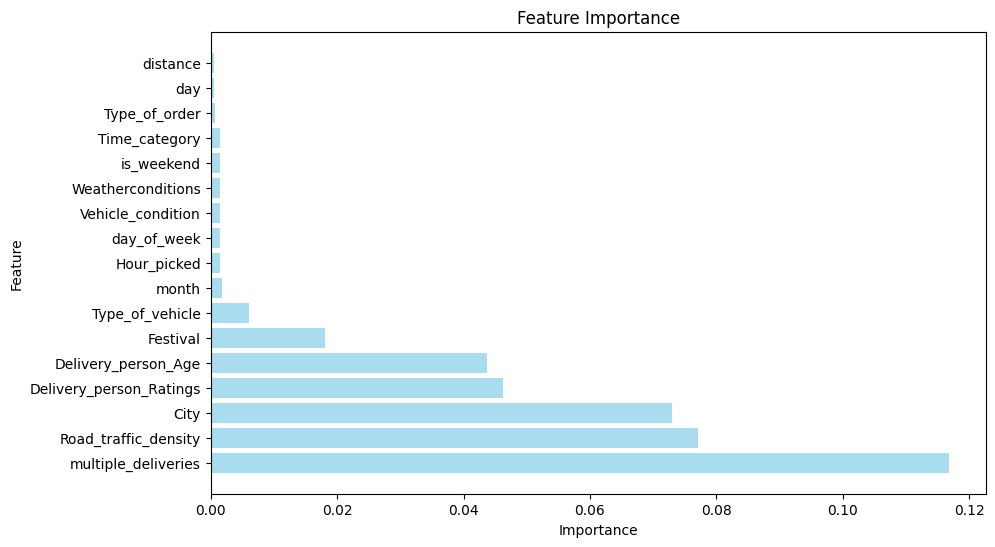

In [18]:
import matplotlib.pyplot as plt

# Liste des noms de caractéristiques
feature_names = ["multiple_deliveries", "Road_traffic_density", "City", "Delivery_person_Ratings", "Delivery_person_Age", 
                 "Festival", "Type_of_vehicle", "month", "Hour_picked", "day_of_week", "Vehicle_condition", "Weatherconditions",
                 "is_weekend", "Time_category", "Type_of_order", "day", "distance"]

# Liste des importances des caractéristiques (à remplacer avec les valeurs)
feature_importances = [0.11674280782310369, 0.07706432071633372, 0.07302801687468281, 0.04618891307805046, 0.04367665029029136, 
                       0.018038971642907485, 0.00605689423512641, 0.0017565343661322455, 0.0015539592108683104, 0.0015504575693337046,
                       0.0014745650680872322, 0.0014710130632282486, 0.001429333106820351, 0.0014158082446889644, 0.000681839585214646,
                       0.00048232293367624025, 0.0004674538514060392]

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center', color='skyblue', alpha=0.7)

plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
